# 2.5 метрики качества модели

## Возвращаемся к дэйтингу, 

некий Анатолий зарегистрировался в приложении знакомств, некий алгоритм на основе машинного обучения порекомендовал Анатолию 30 фотографий из 100. Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем выяснилось, что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.

Будем считать, что  лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. Соответственно предсказанный лайк, совпавший с реальным - True positive, предсказанный лайк, не завершившийся реальным лайком - False positive и т. д. Давайте оценим работу алгоритма с точки зрения метрик качества модели.

 	Predicted likes	Predicted dislikes

    Real likes	15	30

    Real dislikes	15	40

    Такой формат представления предсказания модели и реальных исходов называется confusion matrix. Глядя на такую таблицу, легко можно понять, где именно ошибается наша модель. А также рассчитать различные метрики качества модели.

Precision
Recall
F1 score

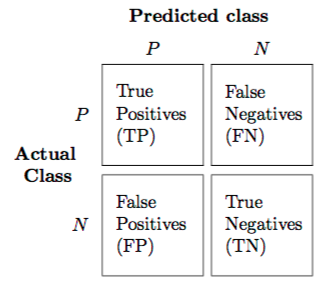

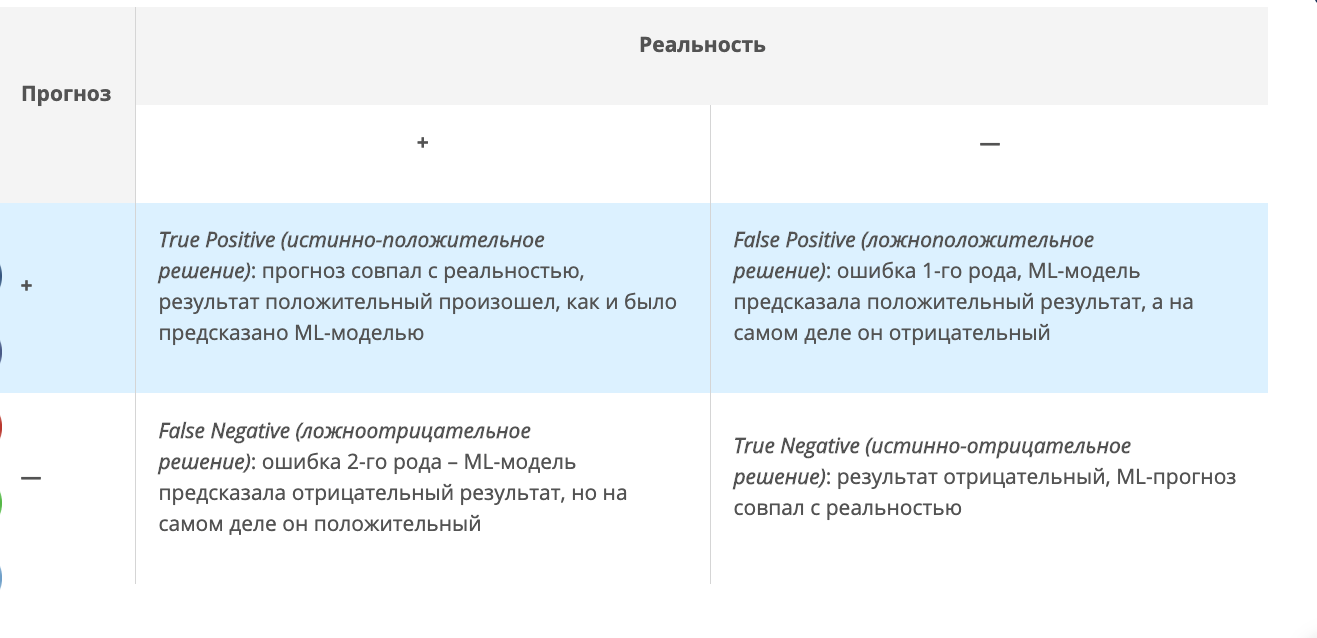

Мне помогло такое рассуждение:

1. ТР - это фотографии, которые "Машина" показала Антону и они понравились ему (15 из 30).

2. FP - это фотографии, которые "Машина" показала Антону и они не понравились ему (тоже 15 из 30).

3. FN - это фотографии, которые "Машина" не показала Антону, но известно, что из этих фотографий какие-то понравились Антону (30 из 70).

4. TN - это фотографии, которые "Машина" не показала Антону, но известно, что из этих фотографий какие-то не понравились Антону (40 из 70).

Predicted dislikes | Real likes = FN

Predicted likes | Real dislikes = FP

F1 = 2 * (precision * recall) / (precision + recall)

In [1]:
TP = 15
FN = 30
FP = 15
TN = 40 

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

F1 = 2 * (Precision * Recall) / (Precision + Recall)

print(f"Precision={Precision}\nRecall={Recall}\nF1={F1}")

Precision=0.5
Recall=0.3333333333333333
F1=0.4


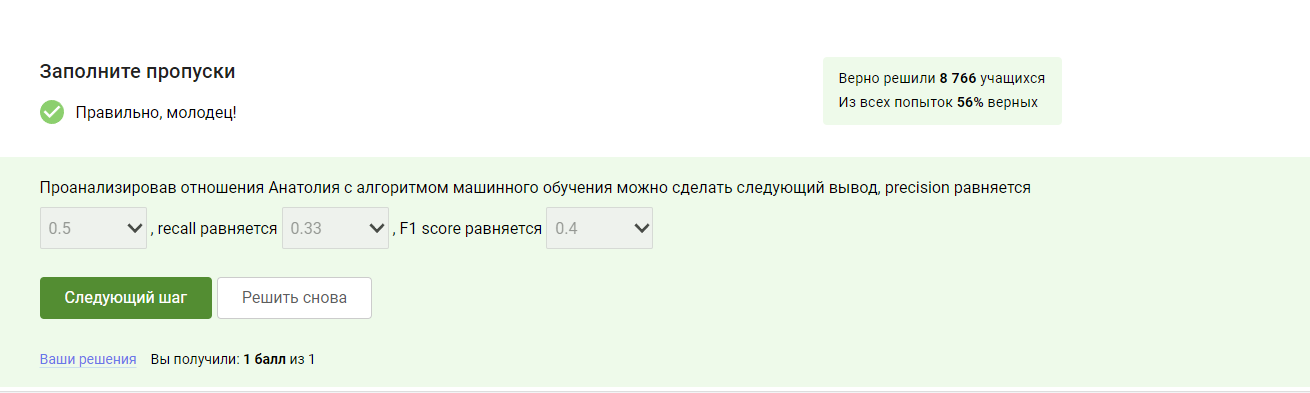

# вопрос

Допустим, мы установили сканер отпечатков пальцев на вход в Институт биоинформатики, теперь любой студент может приложить палец и попасть внутрь. Однако сканер иногда допускает ошибки как первого так и второго рода. 

Служба охраны переживает и очень не хочет, чтобы посторонние люди были распознаны, как студенты. Какую метрику необходимо максимизировать в таком случае.

Будем считать, что

True positive - студент института был действительно распознан как студент.
False positive - не студент института был распознан как студент. 

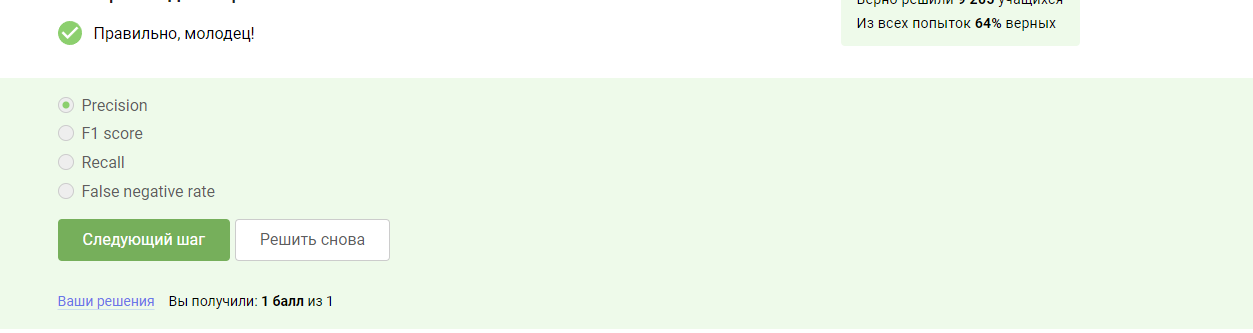

# вопрос

Укажите какой параметр важнее в различных задачах. Помните, precision более важен в ситуациях, где не нужны ложные положительные срабатывания, а recall - там, где не нужны ложные отрицательные.

Например, если руководство страны пытается предотвратить эпидемию, и решило бесплатно выдавать лекарства всем заболевшим, то более важно будет покрыть всю заболевшую аудиторию == минимизировать случаи, когда больной считается здоровым == увеличить recall

Возможно чуть более понятная интерпретация этих метрик:
В поисковых системах, precision - соответствие выданной страницы запросу пользователя, а recall - доля выданных соответствующих страниц к доле всех соответствующих страниц.

###### precision = "не прихватить лишнее?"

recall = "не пропустить нужное ?"

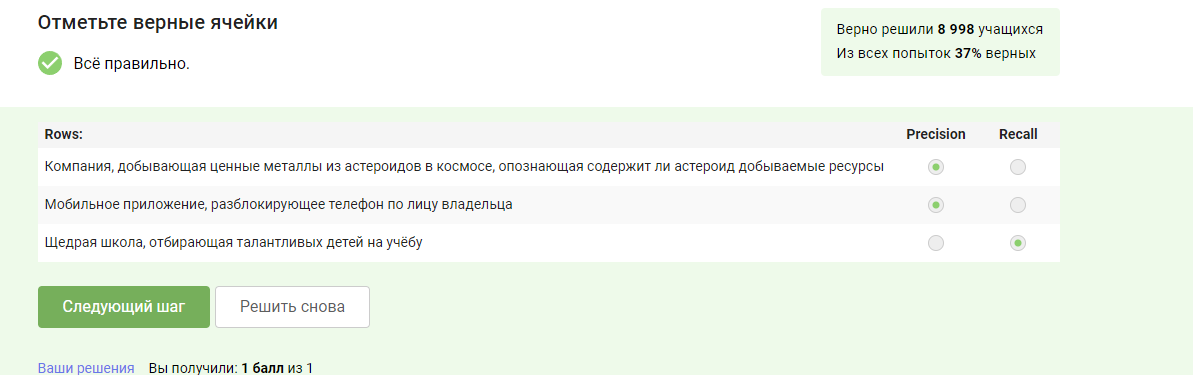

# вопрос

## Укажите верные высказывания:

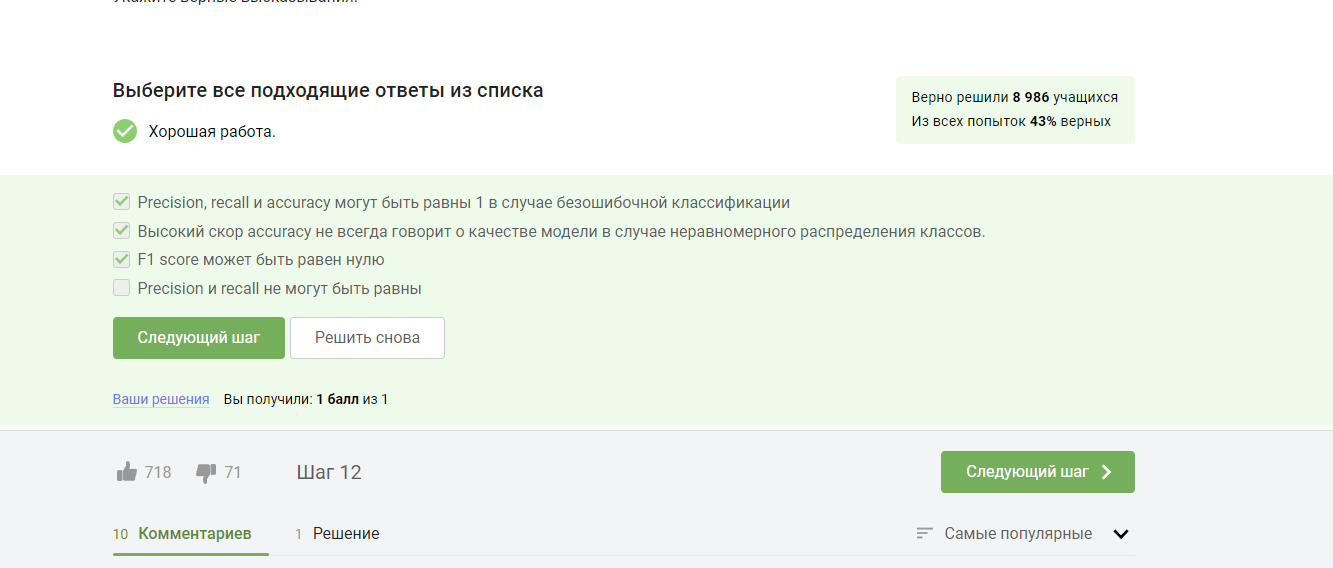

# вопрос

Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train, X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

Исходные данные взяты отсюда, слегка процессированные можно взять здесь 
https://stepik.org/media/attachments/course/4852/songs.csv
(исходные колонки типа жанра, года были выкинуты в задании)

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

In [4]:
songs = pd.read_csv('songs.csv')

In [5]:
songs.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


#### хз както сделал....

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = clf.score(X_test, y_test)


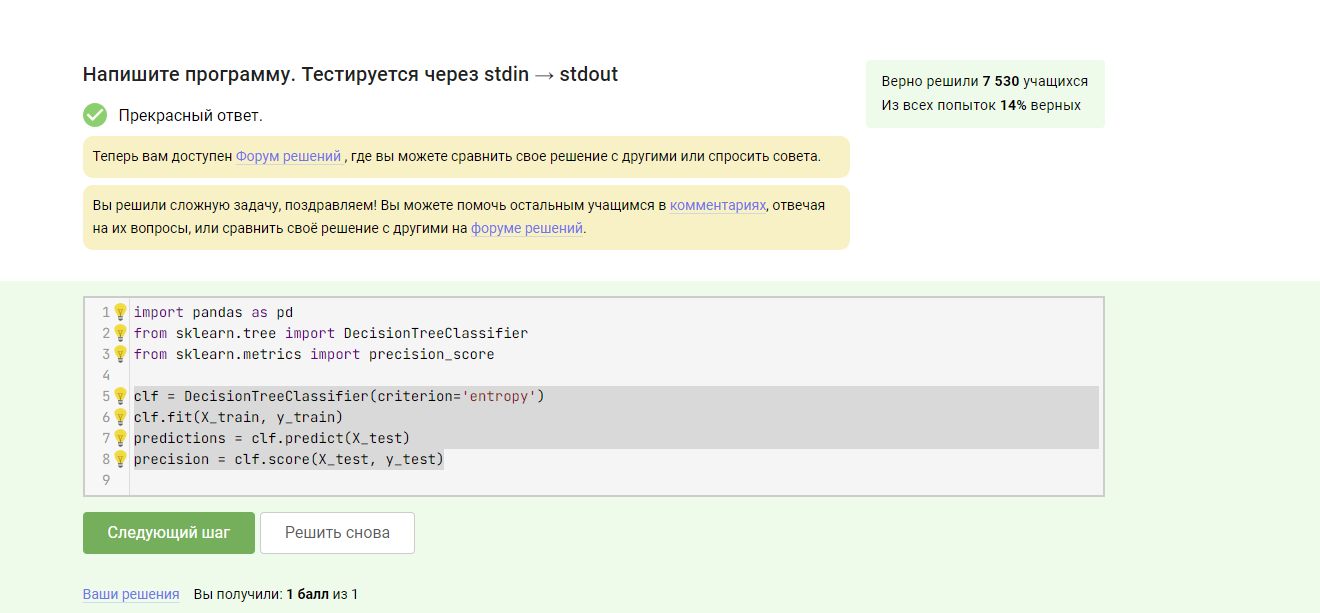

##### еще хз как

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
precision = precision_score(y_test, predictions, average='micro')

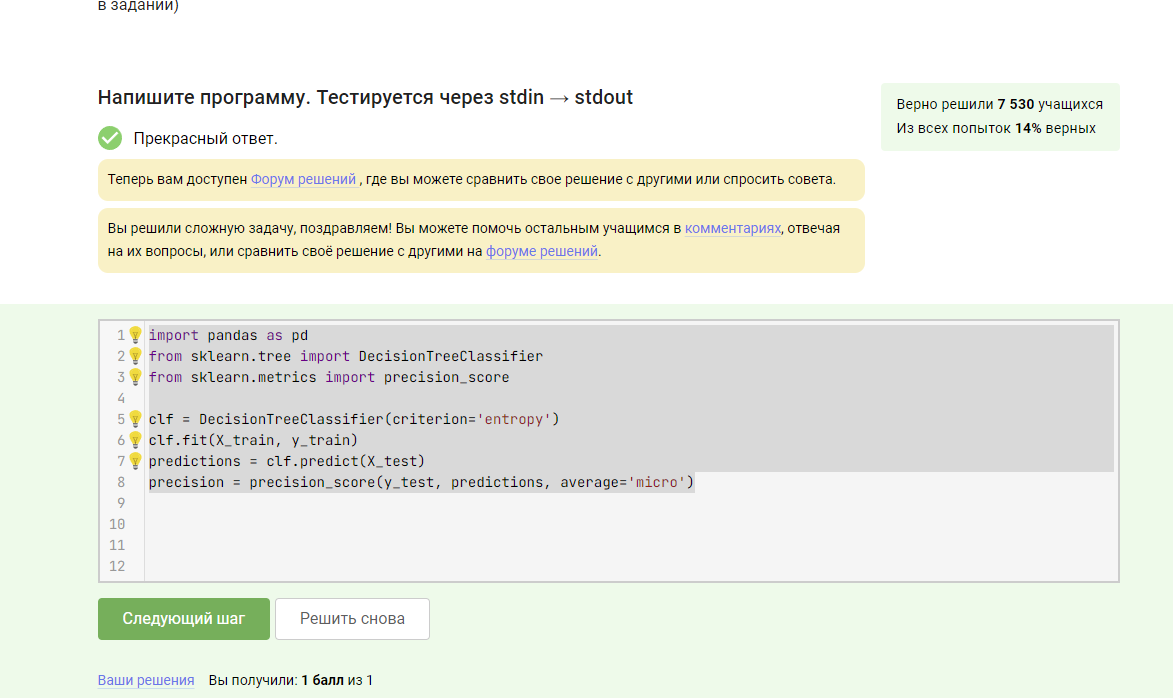

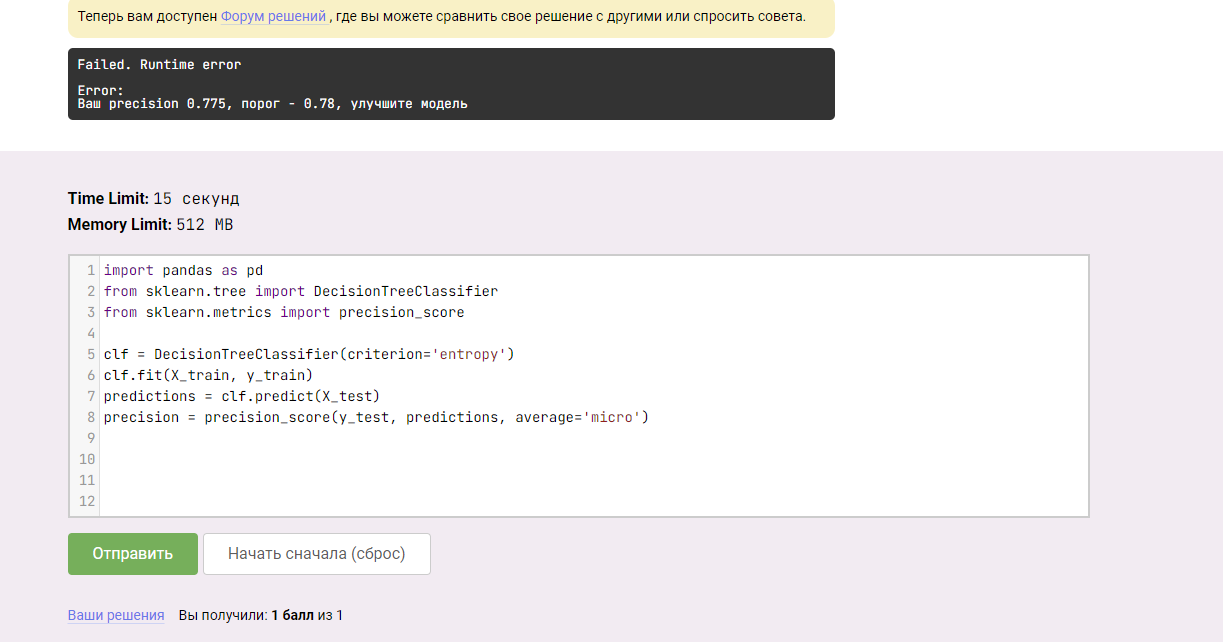

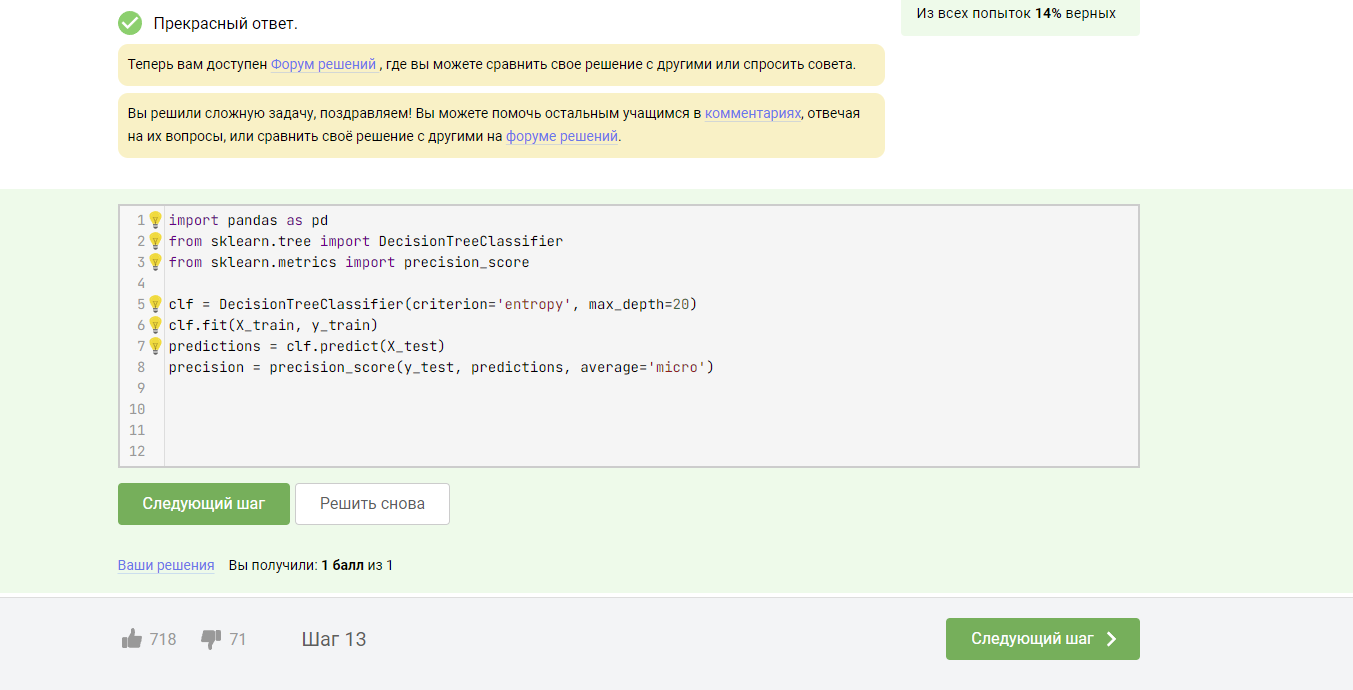